In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path="../data/"
outputs_path="../outputs/"
test_set=pd.read_csv(outputs_path+"general/test_set_final.csv")
train_set=pd.read_csv(outputs_path+"general/train_set_final.csv")
dev_set=pd.read_csv(outputs_path+"general/dev_set_final.csv")


df_g=pd.read_csv("../sg_match/progress_singular_gpt3.csv")
survey=pd.read_csv("../data/others/survey_researchers.csv")
priority=pd.read_json("../data/others/social_needs_priorities.json")
low_ocurrence=pd.read_csv(data_path+"test_data/low_occurrence_annotated.csv")
test_set=test_set.iloc[:2000]

In [3]:
low_ocurrence=low_ocurrence.rename(columns={'Most Related SG goal':'goal1_raw',
       '(if exists) 2nd Related SG Goal':'goal2_raw', '(if exists) 3rd Related SG Goal':'goal3_raw'})
low_ocurrence=low_ocurrence.rename(columns={"SG_or_not":"label"})
low_ocurrence["label"]=low_ocurrence["label"].fillna(0)
low_ocurrence.abstract_clean=low_ocurrence.abstract_clean.fillna('')
low_ocurrence=low_ocurrence.assign(text=low_ocurrence.title_clean+". "+low_ocurrence.abstract_clean)
#low_ocurrence=low_ocurrence.iloc[:97]
df_all_goals=pd.concat([dev_set,train_set,test_set,low_ocurrence]).drop_duplicates(subset=['ID'],keep='first')

In [4]:
df_all_goals=df_all_goals.loc[df_all_goals.label==1]

In [5]:
def extract_predictions_gpt3(df):
    df=df.assign(sdg1=np.where(df['GPT3_response'].str.lower().str.contains("goal 1 |goal 1:|poverty"),1,0))
    df=df.assign(sdg2=np.where(df['GPT3_response'].str.lower().str.contains("goal 2|hunger"),1,0))
    df=df.assign(sdg3=np.where(df['GPT3_response'].str.lower().str.contains("goal 3|health"),1,0))
    df=df.assign(sdg4=np.where(df['GPT3_response'].str.lower().str.contains("goal 4|education"),1,0))
    df=df.assign(sdg5=np.where(df['GPT3_response'].str.lower().str.contains("goal 5|gender"),1,0))
    df=df.assign(sdg6=np.where(df['GPT3_response'].str.lower().str.contains("goal 6|clean water"),1,0))
    df=df.assign(sdg7=np.where(df['GPT3_response'].str.lower().str.contains("goal 7|clean energy"),1,0))
    df=df.assign(sdg8=np.where(df['GPT3_response'].str.lower().str.contains("goal 8|decent work"),1,0))
    df=df.assign(sdg9=np.where(df['GPT3_response'].str.lower().str.contains("goal 9|industry|innovation"),1,0))
    df=df.assign(sdg10=np.where(df['GPT3_response'].str.lower().str.contains("goal 10|inequal"),1,0))
    df=df.assign(sdg11=np.where(df['GPT3_response'].str.lower().str.contains("goal 11|sustainable cities"),1,0))
    df=df.assign(sdg12=np.where(df['GPT3_response'].str.lower().str.contains("goal 12|responsible consumption"),1,0))
    df=df.assign(sdg13=np.where(df['GPT3_response'].str.lower().str.contains("goal 13|climate"),1,0))
    df=df.assign(sdg14=np.where(df['GPT3_response'].str.lower().str.contains("goal 14|life below water"),1,0))
    df=df.assign(sdg15=np.where(df['GPT3_response'].str.lower().str.contains("goal 15|life on land"),1,0))
    df=df.assign(sdg16=np.where(df['GPT3_response'].str.lower().str.contains("goal 16|peace|justice"),1,0))
    df=df.assign(sdg17=np.where(df['GPT3_response'].str.lower().str.contains("goal 17|partnership"),1,0))
    return df

In [6]:
mapping_sdg={'sdg1': 'No Poverty',
 'sdg2': 'Zero Hunger',
 'sdg3': 'Good Health and Well-Being',
 'sdg4': 'Quality Education',
 'sdg5': 'Gender Equality',
 'sdg6': 'Clean Water and Sanitation',
 'sdg7': 'Affordable and Clean Energy',
 'sdg8': 'Decent Work and Economic Growth',
 'sdg9': 'Industry, Innovation and Infrastructure',
 'sdg10': 'Reduced Inequalities',
 'sdg11': 'Sustainable Cities and Communities',
 'sdg12': 'Responsible Consumption and Production',
 'sdg13': 'Climate Action',
 'sdg14': 'Life Below Water',
 'sdg15': 'Life on Land',
 'sdg16': 'Peace, Justice and Strong Institutions',
 'sdg17': 'Partnership for the Goals'
}

In [7]:
df_all_goals.goal1_raw=df_all_goals.goal1_raw.fillna('')
df_all_goals.goal2_raw=df_all_goals.goal2_raw.fillna('')
df_all_goals.goal3_raw=df_all_goals.goal3_raw.fillna('')
df_all_goals=df_all_goals.assign(goal1=np.where(df_all_goals['goal1_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all_goals=df_all_goals.assign(goal2=np.where(df_all_goals['goal2_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("marine_life"),'Life Below Water',         
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all_goals=df_all_goals.assign(goal3=np.where(df_all_goals['goal3_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))


In [8]:
df_group=pd.concat([df_all_goals.loc[:,['ID','goal1']],df_all_goals.loc[:,['ID','goal2']].rename(columns={'goal2':'goal1'}),df_all_goals.loc[:,['ID','goal3']].rename(columns={'goal3':'goal1'})])

In [9]:
df_group

,ID,goal1
2,zerva-ananiadou-2015-event,Good Health and Well-Being
4,yamakoshi-etal-2021-evaluation,Decent Work and Economic Growth
12,pitenis-etal-2020-offensive,"Peace, Justice and Strong Institutions"
25,velupillai-2014-temporal,Good Health and Well-Being
27,bommadi-etal-2021-automatic,Quality Education
...,...,...
260,matthews-etal-2021-gender,
261,gonen-goldberg-2019-lipstick,
262,zhao-etal-2019-gender,
263,zhang-etal-2020-robustness,


In [10]:
df_group=df_group.loc[df_group.goal1!='']

In [11]:
df_group=df_group.rename(columns={'goal1':'Goal'})

In [12]:
df_group=df_group.groupby(['Goal']).ID.count().reset_index()

In [13]:
df_papers=pd.concat([df_group]).groupby(['Goal']).ID.sum().reset_index()

In [14]:
survey['Most Related SG goal']=survey['Most Related SG goal'].fillna('')
survey['(if exists) 2nd Related SG Goal']=survey['(if exists) 2nd Related SG Goal'].fillna('')
survey=survey.assign(goal1=np.where(survey['Most Related SG goal'].str.lower().str.contains("education"),'Quality Education',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("partnership"),'Partnership for the Goals',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(survey['Most Related SG goal'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

survey=survey.assign(goal2=np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("education"),'Quality Education',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("marine_life"),'Life Below Water',         
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("partnership"),'Partnership for the Goals',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(survey['(if exists) 2nd Related SG Goal'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))


In [15]:
survey=survey.assign(weight=np.where(survey.goal2=='',1,0.5))

In [16]:
goals2=survey.loc[(survey.goal2!=''),['goal2','weight']].rename(columns={'goal2':'Goal'})
goals1=survey.loc[(survey.goal1!=''),['goal1','weight']].rename(columns={'goal1':'Goal'})
surv=pd.concat([goals1,goals2])

In [17]:
surv.weight.sum()

141.0

In [18]:
surv=surv.groupby('Goal').weight.sum().reset_index()

In [19]:
#surv.weight=100*(surv.weight/surv.weight.sum())
surv.weight=100*(surv.weight/80)

In [20]:
surv.weight=surv.weight.apply(lambda x:round(x,2))

In [21]:
surv

,Goal,weight
0,Climate Action,5.00
1,Decent Work and Economic Growth,5.62
2,Gender Equality,8.75
3,Good Health and Well-Being,21.88
4,"Industry, Innovation and Infrastructure",14.37
5,No Poverty,3.12
6,Partnership for the Goals,3.75
7,"Peace, Justice and Strong Institutions",52.50
8,Quality Education,21.88
9,Reduced Inequalities,38.12


In [22]:
priority.Goal=priority.Goal.replace({'Industry, Innovation and Infrastrucure':'Industry, Innovation and Infrastructure',
                                    'No Hunger':'Zero Hunger'})

In [23]:
set(priority.Goal.values).symmetric_difference(set(surv.Goal.values))

{'Affordable and Clean Energy',
 'Clean Water and Sanitation',
 'Life Below Water',
 'Life on Land',
 'Sustainable Cities and Communities',
 'Zero Hunger'}

In [24]:
df_all=priority.merge(surv,on=['Goal'],how='left').merge(df_papers,on=['Goal'],how='left')

In [25]:
mapping={
'No Poverty':'G1. Poverty',
'Zero Hunger':'G2. Hunger',
'Good Health and Well-Being':'G3. Health',
'Quality Education':'G4. Education',
'Gender Equality':'G5. Gender',
'Clean Water and Sanitation':'G6. Water',
'Affordable and Clean Energy':'G7. Energy',
'Decent Work and Economic Growth':'G8. Economy',
'Industry, Innovation and Infrastructure':'G9. Innovation',
'Industry, Innovation and Infrastrucure':'G9. Innovation',
'Reduced Inequalities':'G10. Inequalities',
'Sustainable Cities and Communities':'G11. Sustainable Cities',
'Responsible Consumption and Production':'G12. Consumption',
'Climate Action':'G13. Climate',
'Life Below Water':'G14. Life Below Water',
'Life on Land':'G15. Life on Land',
'Peace, Justice and Strong Institutions':'G16. Peace',
'Partnership for the Goals':'G17. Partnership'
}


In [26]:
mapping_all={
'No Poverty':'G1. No Poverty',
'Zero Hunger':'G2. No Hunger',
'Good Health and Well-Being':'G3. Good Health and Well-Being',
'Quality Education':'G4. Quality Education',
'Gender Equality':'G5. Gender Equality',
'Clean Water and Sanitation':'G6. Clean Water and Sanitation',
'Affordable and Clean Energy':'G7. Affordable and Clean Energy',
'Decent Work and Economic Growth':'G8. Decent Work and Economic Growth',
'Industry, Innovation and Infrastructure':'G9. Industry, Innovation and Infrastructure',
'Industry, Innovation and Infrastrucure':'G9. Industry, Innovation and Infrastructure',
'Reduced Inequalities':'G10. Reduced Inequalities',
'Sustainable Cities and Communities':'G11. Sustainable Cities and Communities',
'Responsible Consumption and Production':'G12. Responsible Consumption and Production',
'Climate Action':'G13. Climate Action',
'Life Below Water':'G14. Life Below Water',
'Life on Land':'G15. Life on Land',
'Peace, Justice and Strong Institutions':'G16. Peace, Justice and Strong Institutions',
'Partnership for the Goals':'G17. Partnership for the Goals'
}


In [27]:
df_all['goal_short']=df_all.Goal.replace(mapping)

In [28]:
df_all['goal_long']=df_all.Goal.replace(mapping_all)

In [29]:
df_all.ID=df_all.ID.fillna(0)

In [30]:
df_all.weight=df_all.weight.fillna(0)

In [31]:
df_all.reset_index().to_json("scores.json",orient="records")

In [32]:
survey_save=df_all.loc[:,['Goal','weight']]

In [33]:
survey_save=survey_save.assign(Normalized_proportion=round(100*(survey_save.weight/survey_save.weight.sum()),2))

In [34]:
survey_save.to_json("proportions_survey.json",orient="records")

In [35]:
import matplotlib as mpl
label_size = 22
mpl.rcParams['ytick.labelsize'] = label_size 

In [36]:
plt.rcParams['xtick.labelsize'] = 16

In [37]:
mpl.__version__

'3.6.2'

In [38]:
import mpl_toolkits.axisartist as axisartist

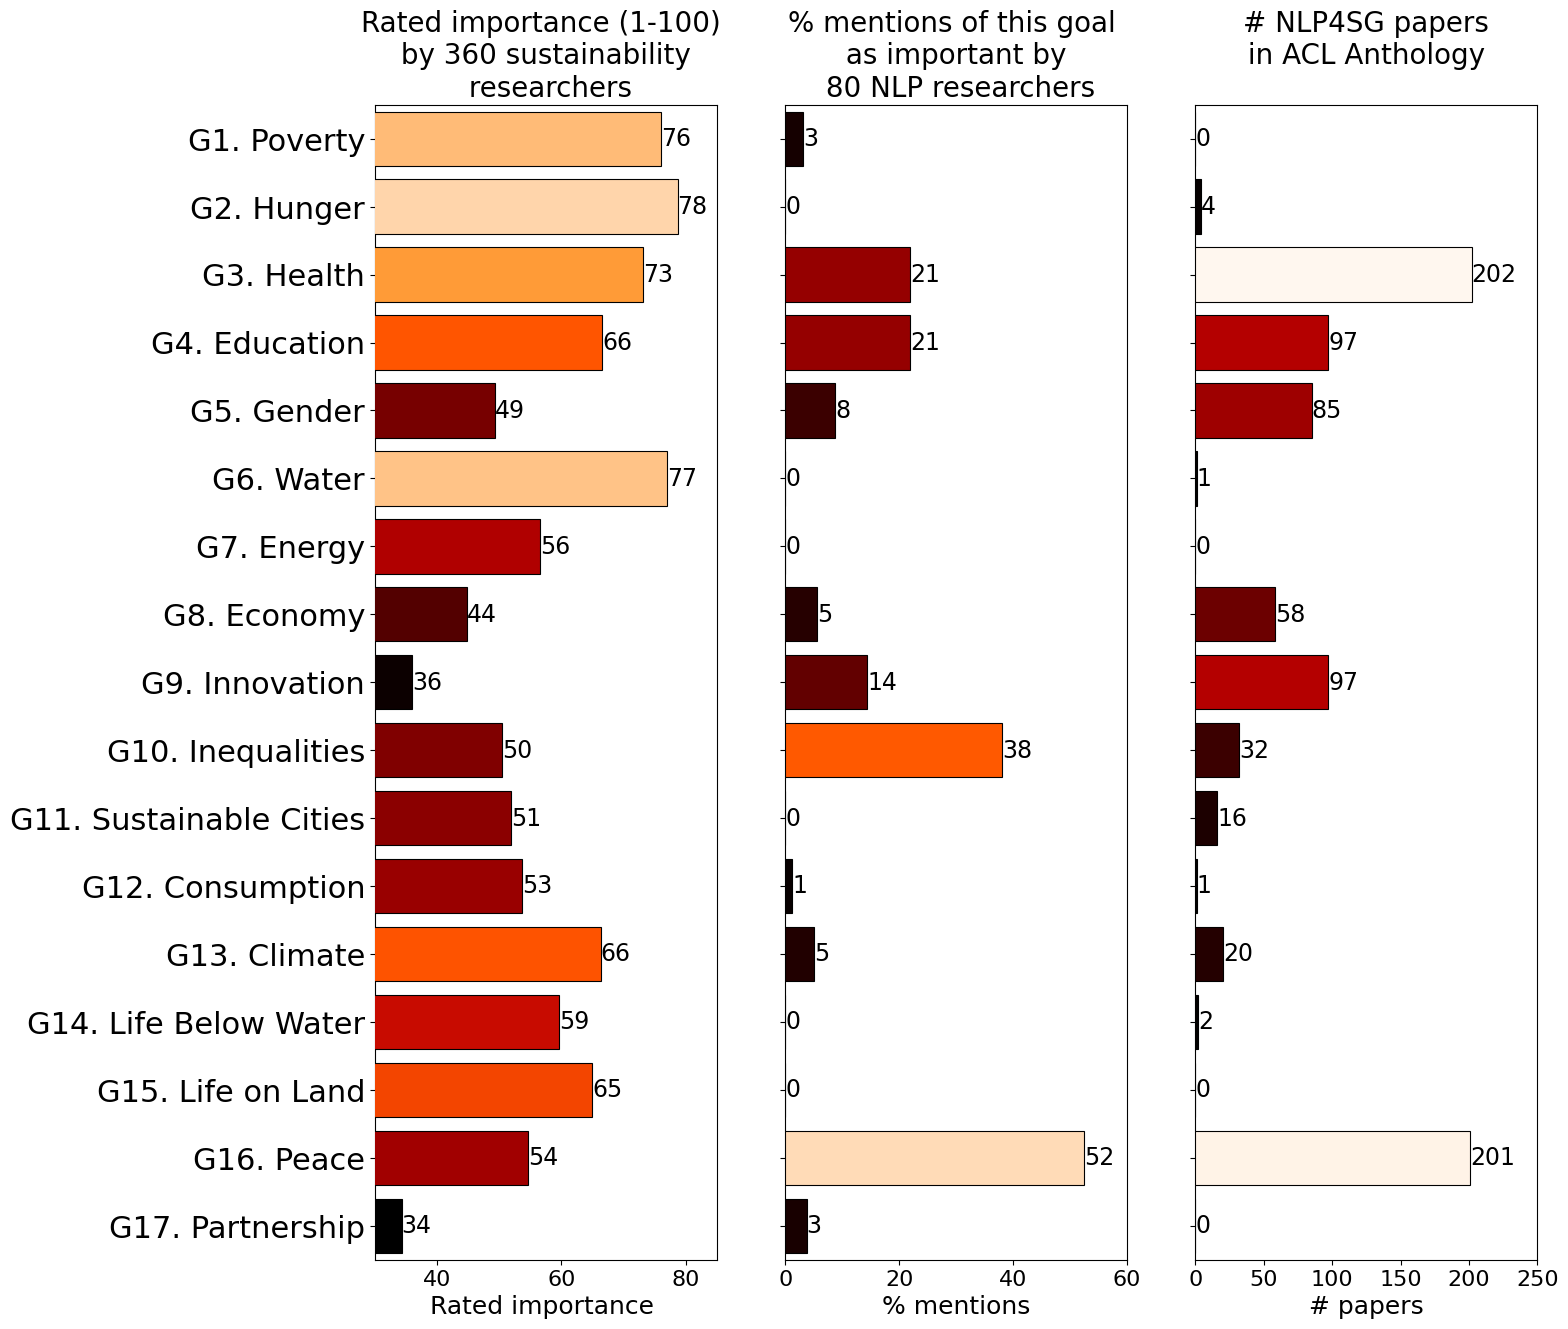

In [39]:
fig, ax = plt.subplots(1, 3,sharey=True,figsize=(15, 15))
my_cmap = plt.get_cmap("gist_heat")
def rescale(y):
    if np.max(y)<1000:
        return (y - np.min(y)) / (np.max(y)+4 - np.min(y))
    else:
        return (y - np.min(y)) / (np.max(y)+300 - np.min(y))
bars2=ax.flatten()[2].barh(df_all.goal_short,df_all.ID,zorder=3,color=my_cmap(rescale(df_all.ID)),linewidth=0.8,edgecolor="black")
ax.flatten()[2].bar_label(bars2,fmt='%d',fontsize=17)
ax.flatten()[2].set_title("# NLP4SG papers\n in ACL Anthology \n", fontsize=20)
ax.flatten()[2].set_xlabel("# papers",fontsize=18,multialignment='center')
bars1=ax.flatten()[1].barh(df_all.goal_short,df_all.weight,zorder=3,color=my_cmap(rescale(df_all.weight)),linewidth=0.8,edgecolor="black")
ax.flatten()[1].bar_label(bars1,fmt='%d',fontsize=17)
ax.flatten()[1].set_title("% mentions of this goal \n as important by \n 80 NLP researchers", fontsize=20,multialignment='center')
ax.flatten()[1].set_xlabel("% mentions",fontsize=18,multialignment='center')
bars0=ax.flatten()[0].barh(df_all.goal_short,df_all.priority_score,zorder=3,color=my_cmap(rescale(df_all.priority_score)),linewidth=0.8,edgecolor="black")
ax.flatten()[0].bar_label(bars0,fmt='%d',fontsize=17)
ax.flatten()[0].set_title("Rated importance (1-100) \n by 360 sustainability \n researchers", fontsize=20,multialignment='center')
ax.flatten()[0].set_xlabel("Rated importance ",fontsize=18,multialignment='center')
#ax.flatten()[2].grid(zorder=0)
#ax.flatten()[1].grid(zorder=0)
#ax.flatten()[0].grid(zorder=0)
ax.flatten()[2].set_xlim(right=250)
ax.flatten()[1].set_xlim(right=60)
ax.flatten()[0].set_xlim(right=85,left=30)

plt.ylim([-0.5,16.5])

plt.gca().invert_yaxis()
#yax = ax.flatten()[0].get_yaxis()
#r = ax.flatten()[1].set_yticklabels(ax.flatten()[1].get_yticklabels(),ha = 'left')
#yax.set_tick_params(pad=1)
plt.savefig("comparison_color_gold.pdf",dpi=500,bbox_inches='tight')
plt.draw()